count        5187.000000
mean         5241.663510
std        217546.493714
min             0.000001
25%             0.828380
50%             2.096218
75%             4.286305
max      12396383.000000
Name: returns, dtype: object
AxesSubplot(0.125,0.125;0.775x0.755)
          budget    returns  runtime language  vote_average      genre  \
0     30000000.0  12.451801     81.0       en           7.7  Animation   
1     65000000.0   4.043035    104.0       en           6.9  Adventure   
2     16000000.0   5.090760    127.0       en           6.1     Comedy   
3     60000000.0   3.123947    170.0       en           7.7     Action   
4     35000000.0   1.838576    106.0       en           5.5     Action   
...          ...        ...      ...      ...           ...        ...   
5182  50000000.0   1.338279     86.0       en           5.8     Comedy   
5183  11000000.0  16.797291    111.0       en           7.4     Action   
5184  12000000.0   1.583333    185.0       ta           6.9     Acti

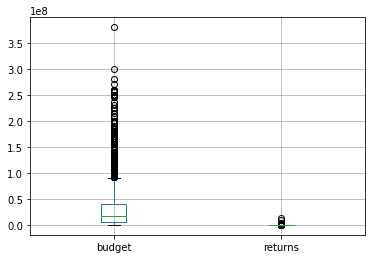

In [33]:
from operator import itemgetter

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from pandas import DataFrame
from pandas import options
from pandas import crosstab
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt


def RepresentsInt(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

moviesdata = []
profitclass = []
with open('./data/movies_metadata.csv', newline='', encoding="utf8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        genrelistdict = ast.literal_eval(row['genres'][0:])
        try:
            genre = genrelistdict[0]['name']
        except:
            genre = ""

        try:
            prodcountrylistdict = ast.literal_eval(row['production_countries'][0:])
            prodcountry = prodcountrylistdict[0]['name']
        except:
            prodcountry = ""

        try:
            prodcomplistdict = ast.literal_eval(row['production_companies'][0:])
            prodcomp = prodcomplistdict[0]['name']
        except:
            prodcomp = ""

        if row['budget'] != "0" and row['revenue'] != "0" and RepresentsInt(row['budget']) and row['runtime'] != "" and genre != "" and prodcountry != "" and prodcomp != "":

            budget = float(row['budget'])
            revenue = float(row['revenue'])
            runtime = float(row['runtime'])
            language = str(row['original_language'])
            vote_average = float(row['vote_average'])
            returns = revenue / budget

            if revenue > 7000000 and returns > 1:
                revenue = "Profitable"
            else:
                revenue = "Not Profitable"

            moviesdata.append([budget,returns,runtime,language,vote_average,genre,prodcountry,prodcomp])
            profitclass.append(revenue)

moviesdata = DataFrame(moviesdata,columns=["budget","returns","runtime","language","vote_average","genre","prodcountry","prodcomp"])
profitclass = DataFrame(profitclass,columns=["revenue"])

print(moviesdata['returns'].describe().apply(lambda x: format(x, 'f')))
print(moviesdata.boxplot(column=['budget', 'returns']))

print(moviesdata)

ordinal = OrdinalEncoder()
X = ordinal.fit_transform(moviesdata)
print(X)

y = np.ravel(profitclass)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20)




Decision Tree Score before improvment:  0.9961464354527938 

Decision Tree Confusion Matrix before improvment: 
Predicted       Not Profitable  Profitable   All
Actual                                          
Not Profitable             379           3   382
Profitable                   1         655   656
All                        380         658  1038
Confusion matrix Movie Profitability Classifier
[[0.9921466  0.0078534 ]
 [0.00152439 0.99847561]]


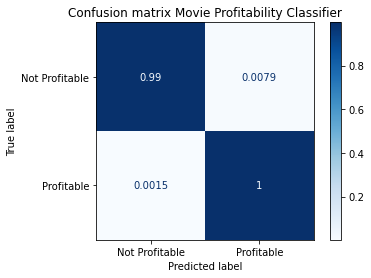

In [41]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

pred_dt = classifier.score(X_test, y_test)
print("Decision Tree Score before improvment: ", pred_dt, "\n")

y_test_predicted_dt = classifier.predict(X_test)
df_confusion_dt = crosstab(y_test, y_test_predicted_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Decision Tree Confusion Matrix before improvment: ")
print(df_confusion_dt)

classnames = ['Not Profitable', 'Profitable']
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title("Confusion matrix Movie Profitability Classifier")

print("Confusion matrix Movie Profitability Classifier")
print(disp.confusion_matrix)
plt.show()

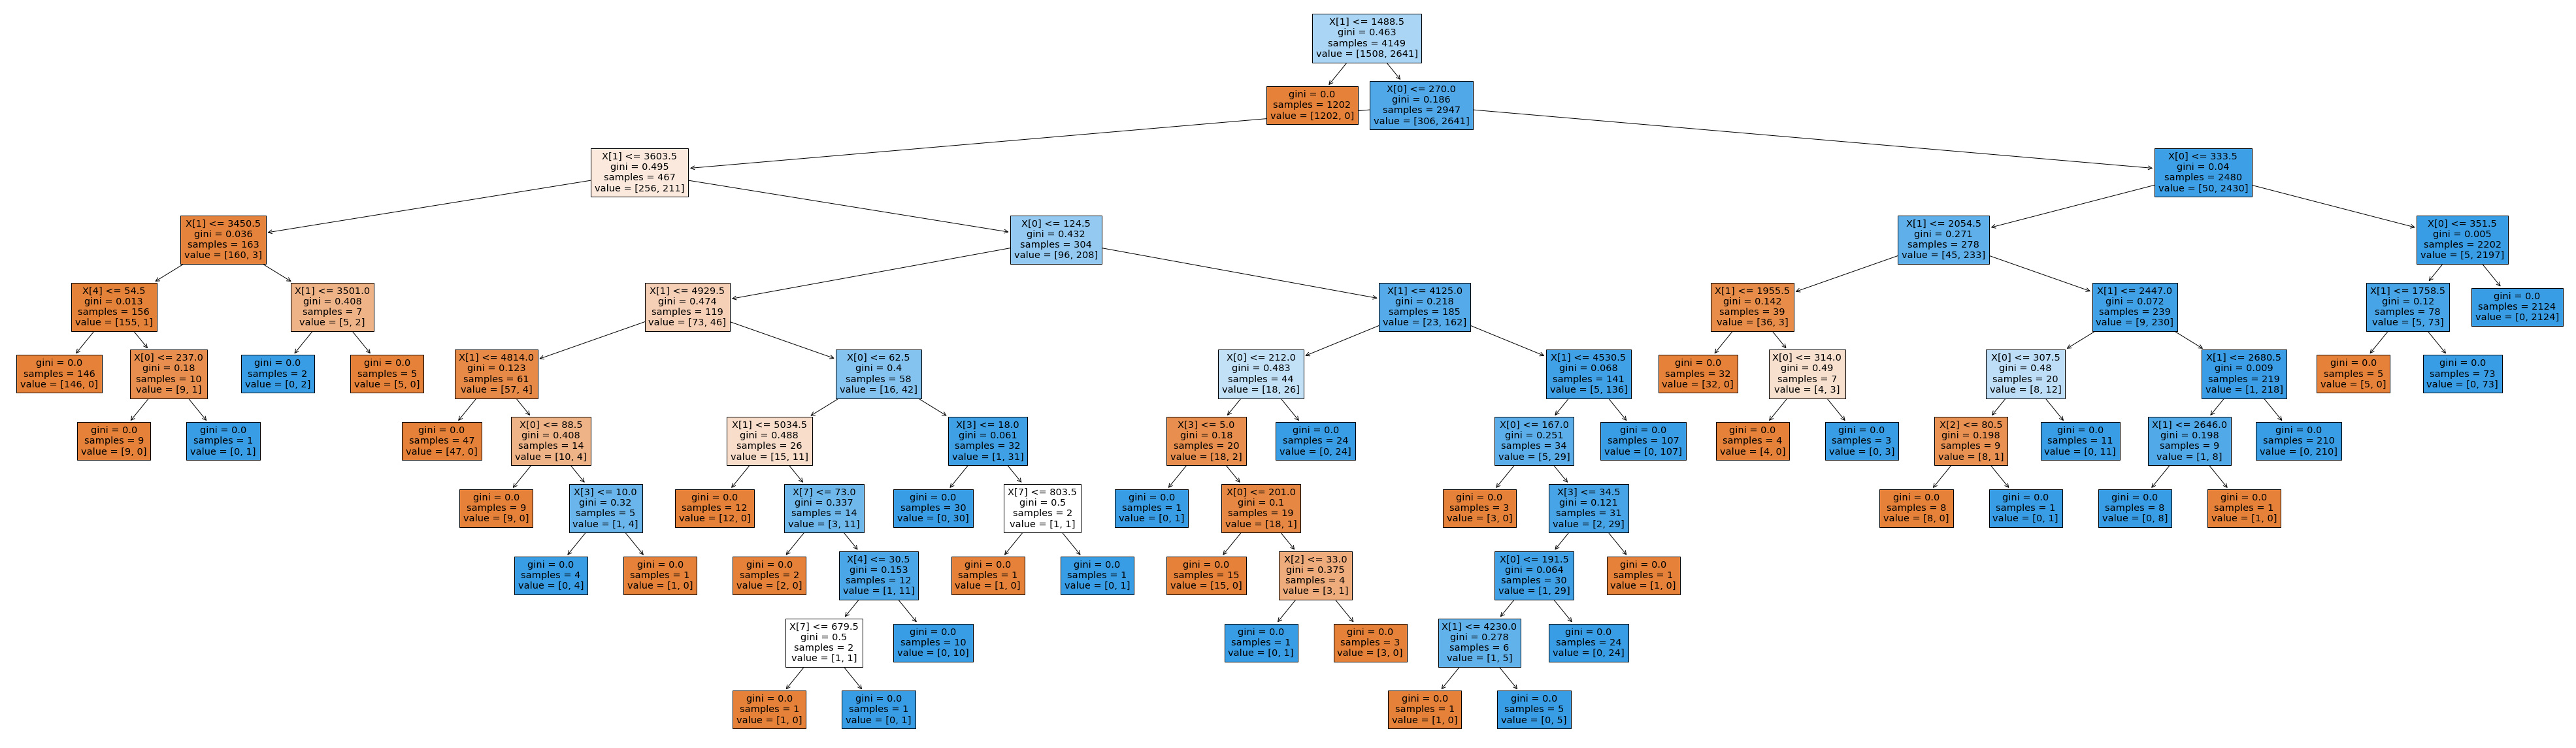

Figure 1: Decision tree showing the classification of data and parameters for splitting decision before improvment


In [42]:
plt.figure(figsize=[70.4, 20.8])
tree.plot_tree(classifier, filled = True)
plt.show()
print("Figure 1: Decision tree showing the classification of data and parameters for splitting decision before improvment")

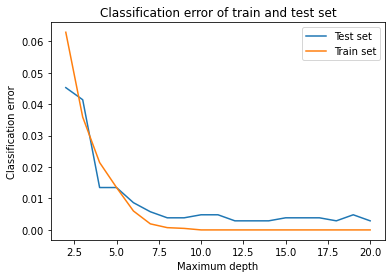

Figure 2: Plot showing the classification error (y-axis) for both the train and test set for level 2 to 20 of maximum depth (x-axis)


In [43]:
from sklearn.metrics import accuracy_score


depth_labels = []
class_error_test_list = []
class_error_train_list = []

for depth in range(2,21):
    clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=depth)
    clf = clf.fit(X_train, y_train)

    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    acc_score_test = accuracy_score(y_test, y_pred_test)
    acc_score_train = accuracy_score(y_train, y_pred_train)

    class_error_test = 1-acc_score_test
    class_error_train = 1-acc_score_train
    class_error_test_list.append(class_error_test)
    class_error_train_list.append(class_error_train)
    depth_labels.append(depth)
    
plt.title("Classification error of train and test set")
plt.plot(depth_labels, class_error_test_list)
plt.plot(depth_labels, class_error_train_list)
plt.xlabel("Maximum depth")
plt.ylabel("Classification error")
plt.legend(["Test set","Train set"])
plt.show()
print("Figure 2: Plot showing the classification error (y-axis) for both the train and test set for level 2 to 20 of maximum depth (x-axis)")

Decision Tree Score:  0.9971098265895953 

Decision Tree Confusion Matrix: 
Predicted       Not Profitable  Profitable   All
Actual                                          
Not Profitable             379           3   382
Profitable                   0         656   656
All                        379         659  1038


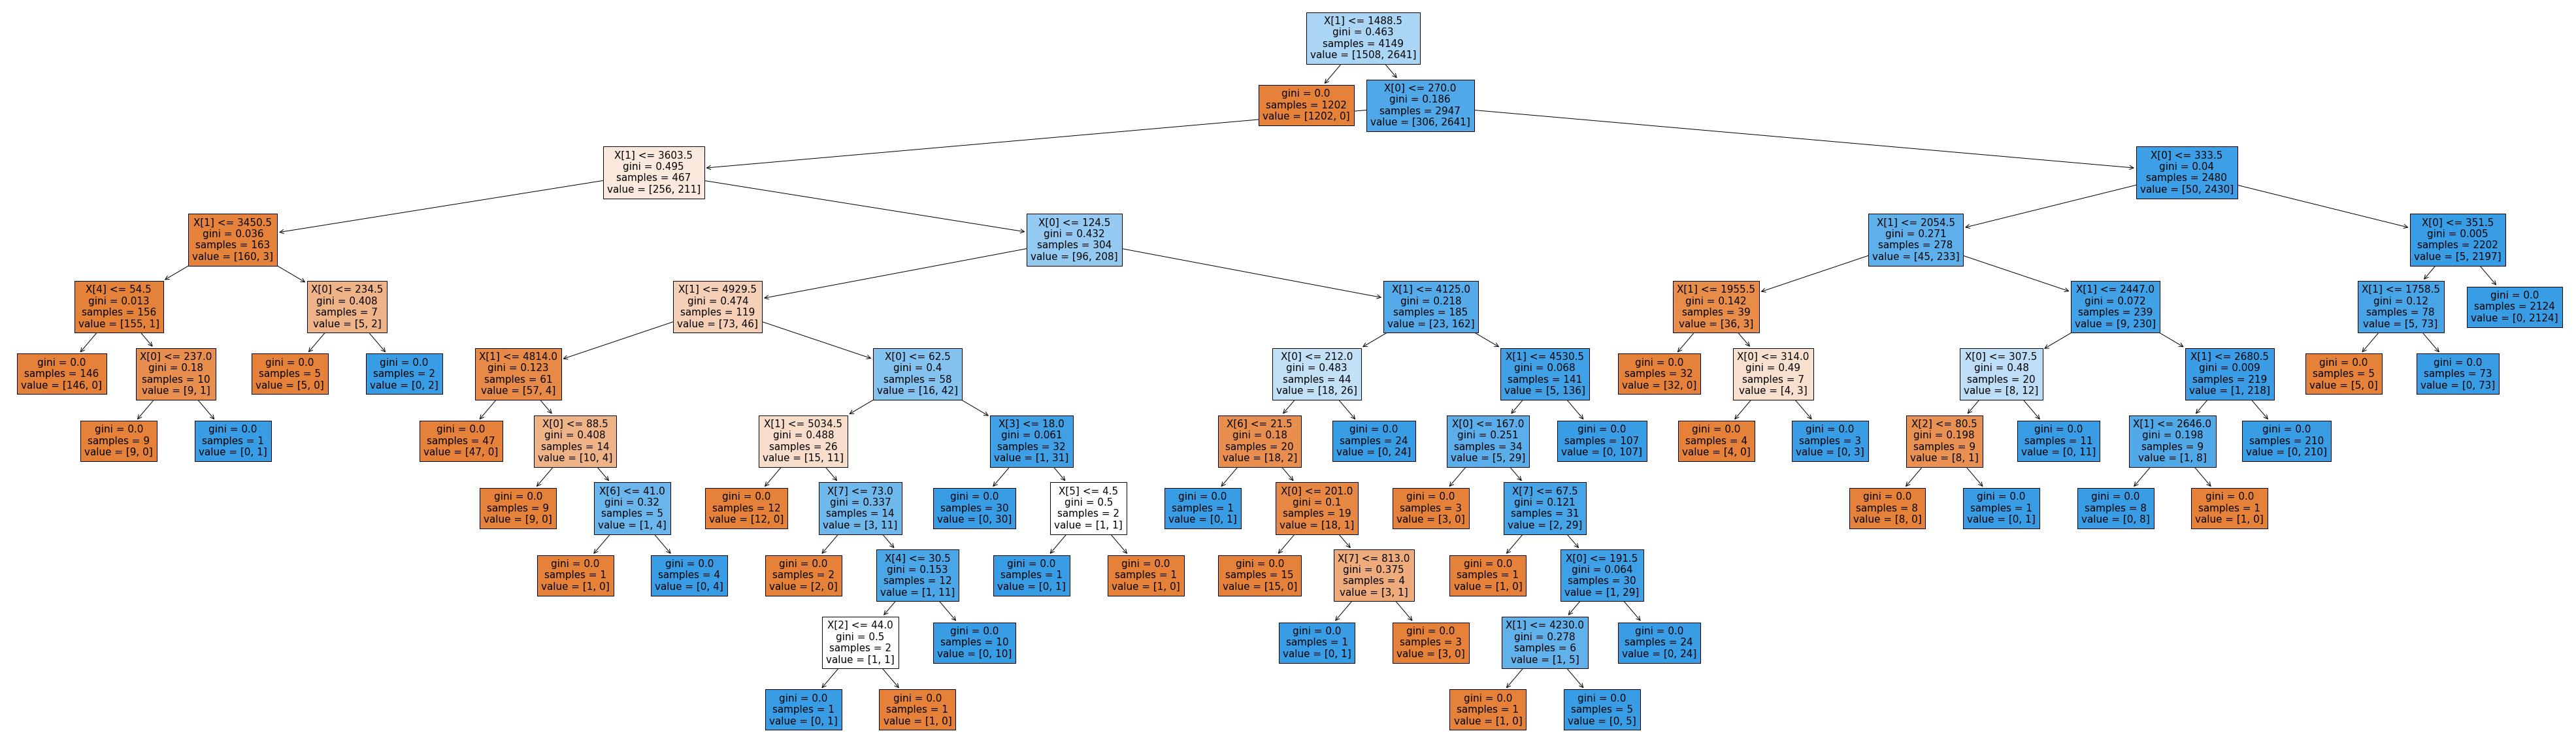

Figure 3: Decision tree showing the classification of data for splitting decision after improvment


In [47]:
classifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=16)
classifier = classifier.fit(X_train, y_train)

pred_dt = classifier.score(X_test, y_test)
print("Decision Tree Score: ", pred_dt, "\n")

y_test_predicted_dt = classifier.predict(X_test)
df_confusion_dt = crosstab(y_test, y_test_predicted_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Decision Tree Confusion Matrix: ")
print(df_confusion_dt)

plt.figure(figsize=[70.4, 20.8])
tree.plot_tree(classifier, filled = True)
plt.show()
print("Figure 3: Decision tree showing the classification of data for splitting decision after improvment")